In [1]:
from utils.realism_helper import *
from utils.get_circuit_discovery_scores import get_realism_scores

def get_all_algos_scores(weights, mean, same_size):
    acdc_realism = get_realism_scores(weight=weights, algorithm='acdc', same_size=same_size)
    acdc_best = get_best_score(acdc_realism, mean)

    node_sp_realism = get_realism_scores(weight=weights, algorithm='node_sp', same_size=same_size)
    node_sp_best = get_best_score(node_sp_realism, mean)

    edge_sp_realism = get_realism_scores(weight=weights, algorithm='edge_sp', same_size=same_size)
    edge_sp_best = get_best_score(edge_sp_realism, mean)

    return acdc_best, node_sp_best, edge_sp_best

In [2]:
same_size = True
acdc_510_best, node_sp_510_best, edge_sp_510_best = get_all_algos_scores(weights="best", mean=True, same_size=same_size)
acdc_tracr_best, node_sp_tracr_best, edge_sp_tracr_best = get_all_algos_scores(weights="tracr", mean=True, same_size=same_size)
acdc_100_best, node_sp_100_best, edge_sp_100_best = get_all_algos_scores(weights="100", mean=True, same_size=same_size)

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:27: FutureW

In [3]:
# bad_runs = ['33', '34', '35', '36', '37', '38', '39', '8', '28']

# for run in bad_runs:
#     if run in acdc_510_best.keys():
#         acdc_510_best.pop(run)
#     if run in node_sp_510_best.keys():
#         node_sp_510_best.pop(run)
#     if run in edge_sp_510_best.keys():
#         edge_sp_510_best.pop(run)

#     if run in acdc_tracr_best.keys():
#         acdc_tracr_best.pop(run)
#     if run in node_sp_tracr_best.keys():
#         node_sp_tracr_best.pop(run)
#     if run in edge_sp_tracr_best.keys():
#         edge_sp_tracr_best.pop(run)

#     if run in acdc_100_best.keys():
#         acdc_100_best.pop(run)
#     if run in node_sp_100_best.keys():
#         node_sp_100_best.pop(run)
#     if run in edge_sp_100_best.keys():
#         edge_sp_100_best.pop(run)

In [3]:
# acdc_tracr_best

In [5]:
# scores = {}

# for run, group in acdc_tracr.groupby('run'):
#     scores[run] = group['score'].max()

# scores

In [6]:
# import numpy as np
# acdc['acdc'] = (combined_tracr['acdc'] + 0.25) / max(combined_tracr['acdc'] + 0.25)

In [3]:
# combined_510 = make_combined_realism_df_from_list([
#     acdc_510_best, node_sp_510_best, edge_sp_510_best
# ], ["acdc", "node_sp", "edge_sp"])

# combined_tracr = make_combined_realism_df_from_list([
#     acdc_tracr_best, node_sp_tracr_best, edge_sp_tracr_best
# ], ["acdc", "node_sp", "edge_sp"])

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# combined_510.boxplot(ax=ax[0],
#                     column=["acdc", "node_sp", "edge_sp"],
#                     patch_artist=True,
#                     showfliers=True,
#                     # whis=[5, 95],
#                     )

# combined_tracr.boxplot(ax=ax[1],
#                     column=["acdc", "node_sp", "edge_sp"],
#                     patch_artist=True,
#                     showfliers=True,
#                     # whis=[5, 95],
#                     )

# # make y axis range 0-1 for both plots
# ax[0].set_ylim(0, 1.1)
# ax[1].set_ylim(0, 1.1)

# ax[0].set_title("Realism Scores for Weight 510")
# ax[1].set_title("Realism Scores for Weight tracr")

In [4]:
acdc_combined = make_combined_realism_df_from_list(
    [acdc_tracr_best, acdc_100_best, acdc_510_best],
    ["tracr", "Natural", "SIIT"]
)

In [6]:
# acdc_combined

In [5]:
# acdc_510_best, acdc_tracr_best

In [11]:
# acdc_combined.sort_values(by='tracr', ascending=False)

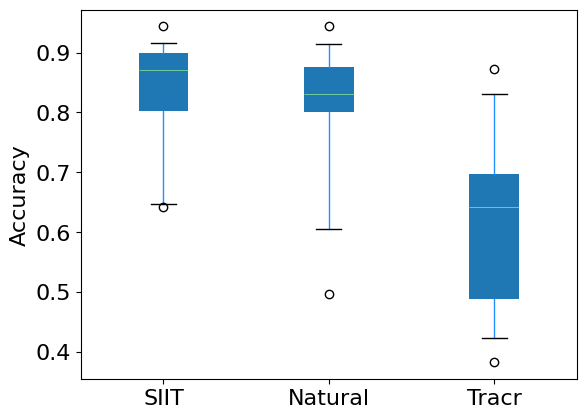

In [7]:
# node_sp_combined = make_combined_realism_df_from_list(
#     [node_sp_510_best, node_sp_100_best, node_sp_tracr_best],
#     ["SIIT", "Natural", "tracr"]
# )

# edge_sp_combined = make_combined_realism_df_from_list(
#     [edge_sp_510_best, edge_sp_100_best, edge_sp_tracr_best],
#     ["SIIT", "Natural", "tracr"]
# )
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})
plt.rcParams.update({'axes.titlesize': 18})
plt.rcParams.update({'xtick.labelsize': 16})
plt.rcParams.update({'ytick.labelsize': 16})
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
natural_col = acdc_combined["Natural"][pd.DataFrame(acdc_combined["Natural"])["Natural"]!='N/A']
siit_col = acdc_combined["SIIT"][pd.DataFrame(acdc_combined["SIIT"])["SIIT"]!='N/A']
tracr_col = acdc_combined["tracr"][pd.DataFrame(acdc_combined["tracr"])["tracr"]!='N/A']

plt.boxplot([siit_col, natural_col, tracr_col], 
            patch_artist=True, 
            showfliers=True,
            whis=[5, 95],
            # showmeans=True,
            # set mean line color
            meanprops=dict(linestyle='-', linewidth=2.5, color='g'),
            whiskerprops=dict(linestyle='-', linewidth=1, 
                              # same as box color
                              color='dodgerblue'),
            medianprops=dict(linestyle='-', linewidth=0.5, color='lightgreen'),
            boxprops=dict(linestyle='-', linewidth=0, color='lightblue'),
            )

# pd.DataFrame(natural_col, columns=["Natural"]).boxplot(column=["Natural"], patch_artist=True, showfliers=True)
# acdc_combined.boxplot(column=["SIIT", "Natural", "tracr"],
#                     patch_artist=True,
#                     showfliers=True,
#                     # whis=[5, 95],
#                     )

plt.xticks([1, 2, 3], ["SIIT", "Natural", "Tracr"])

# plt.title("Average accuracy of circuit across ACDC thresholds")
plt.ylabel("Accuracy")
plt.savefig("plots/realism_plot.pdf", format='pdf', bbox_inches='tight', dpi=600)